In [1]:
import numpy as np
from numpy import random
import math
import time
import matplotlib.pylab as plt

# **Preparation of Algorithms**

## _**Define individual sorting algorithms**_

In [2]:
def insertion_count(data, compObj):
    for i in range(1, len(data)):
        for j in range(i, 0, -1):
            compObj.increase()
            if data[j] < data[j-1]:
                data[j], data[j-1] = data[j-1], data[j]
            else:
                break
    return data

In [3]:
# MERGE SORT - w/ counting of no. of comparisons
def merge(sorted1, sorted2, compObj):
    list1 = sorted1
    list2 = sorted2
    i = j = 0
    newlist = []
    # comparisons = sorted1[1] + sorted2[1]
    
    while i < len(list1) and j < len(list2):
        compObj.increase()
        if list1[i] < list2[j]:
            newlist.append(list1[i])
            i += 1
        elif list1[i] > list2[j]:
            newlist.append(list2[j])
            j += 1
        else:
            newlist.append(list1[i])
            newlist.append(list2[j])
            i += 1
            j += 1

    if i < len(list1):
        newlist.extend(list1[i:])
    else:
        newlist.extend(list2[j:])

    return newlist
    
def merge_sort(data, compObj):
    # Base Case
    if len(data) == 1:
        return data, 0
    # Recursion
    elif len(data) > 1:
        mid = len(data)//2
        lower = data[:mid]
        upper = data[mid:]
        sorted1 = merge_sort(lower, compObj) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)
        sorted2 = merge_sort(upper, compObj) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)
        return merge(sorted1, sorted2, compObj)

## _**Class: Store Key Comparison across different functions**_

In [4]:
class KeyComp:
    def __init__(self, comparisons=0):
        self.comparisons = comparisons
    
    def increase(self):
        self.comparisons += 1
    
    def get(self):
        return self.comparisons

## _**Function: Generate Random Dataset**_

In [5]:
def generate_data(size, upper_lim, lower_lim=0):
    """
    Generates array of integers of size 'size' in the range of [lower_lim, upper_lim)]

    Args:
        size: Size of array to be generated
        upper_lim: Upper limit of range
        lower_lim: Lower limit of range
    
    Returns:
        Generated array
    """
    
    return random.randint(low=lower_lim, high=upper_lim, size=size)

## _**Function: Time Taken + No. of Comparisons**_

In [6]:
def test_insertion(data, compObj):
    """
    Calculates number of comparisons and time taken by insertion sort to sort the given array

    Returns:
        insertion_comparisons: Number of comparisons made by insertion sort
        insertion_time: Time taken by insertion sort
    """

    start_time = time.time()
    _ = insertion_count(data, compObj)
    insertion_time = time.time() - start_time

    return compObj.get(), insertion_time

In [7]:
def test_merge(data, compObj):
    """
    Calculates number of comparisons and time taken by mergesort to sort the given array

    Returns:
        merge_comparisons: Number of comparisons made by merge sort
        merge_time: Time taken by merge sort
    """

    start_time = time.time()
    _ = merge_sort(data, compObj)
    merge_time = time.time() - start_time

    return compObj.get(), merge_time

In [ ]:
# # def test(size, upper_lim, lower_lim=1):
# #     """
# #     Creates a test array and calculates the time taken and no. of comparisons to sort this test array with insertion sort and mergesort

# #     Args:
# #         upper_lim: Highest possible integer value in the data
# #         size: Size of array to be sorted

# #     Returns:
# #         insertion_comparions: Number of comparisons made by insertion sort
# #         insertion_time: Time taken by insertion sort
# #         merge_comparisons: Number of comparisons made by merge sort
# #         merge_time: Time taken by merge sort
# #     """

# #     # Generate random data
# #     data = random.randint(low=lower_lim, high=upper_lim, size=size)

# #     # Calculate insertion sort data
# #     start_time = time.time()
# #     _, insertion_comparisons = insertion_count(data)
# #     insertion_time = time.time() - start_time

# #     # Calculate merge sort data
# #     start_time = time.time()
# #     _, merge_comparisons = merge_sort(data)
# #     merge_time = time.time() - start_time

# #     return insertion_comparisons, insertion_time, merge_comparisons, merge_time

# def test(data):
#     """
#     Creates a test array and calculates the time taken and no. of comparisons to sort this test array with insertion sort and mergesort

#     Args:
#         upper_lim: Highest possible integer value in the data
#         size: Size of array to be sorted

#     Returns:
#         insertion_comparions: Number of comparisons made by insertion sort
#         insertion_time: Time taken by insertion sort
#         merge_comparisons: Number of comparisons made by merge sort
#         merge_time: Time taken by merge sort
#     """

#     # Calculate insertion sort data
#     start_time = time.time()
#     _, insertion_comparisons = insertion_count(data)
#     insertion_time = time.time() - start_time

#     # Calculate merge sort data
#     start_time = time.time()
#     _, merge_comparisons = merge_sort(data)
#     merge_time = time.time() - start_time

#     return insertion_comparisons, insertion_time, merge_comparisons, merge_time

Due to fluctuations caused by randomness of dataset, we should conduct multiple tests and obtain the average.

In [8]:
def insertion_merge_stats(iterations, all_sizes):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for insertion sort and merge sort for a range of sizes

    Args:
        iterations: Number of tests to be conducted for each size
        all_sizes: List of sizes to be tested

    Returns:
        insertion_comparison_array: Array of number of comparisons for each size for insertion sort
        insertion_time_array: Array of time taken for each size for insertion sort
        merge_comparison_array: Array of number of comparisons for each size for merge sort
        merge_time_array: Array of time taken for each size for merge
    """

    insertion_comparison_array = []
    insertion_time_array = []
    compInsert = KeyComp()
    merge_comparison_array = []
    merge_time_array = []
    compMerge = KeyComp()

    for i in range(len(all_sizes)):
        size = all_sizes[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            input_array = generate_data(size=size, upper_lim=1000)
            insertion_comparisons, insertion_time = test_insertion(input_array, compInsert)
            merge_comparisons, merge_time = test_merge(input_array, compMerge)
    
            # i.e. each index in the arrays corresponds to a size
            if (iteration == 0):
                insertion_comparison_array.append(insertion_comparisons)
                insertion_time_array.append(insertion_time)
                merge_comparison_array.append(merge_comparisons)
                merge_time_array.append(merge_time)

            # i.e. each element in the arrays is the average of all iterations for that size   
            else:
                insertion_comparison_array[i] = (insertion_comparison_array[i] + insertion_comparisons) / 2
                insertion_time_array[i] = (insertion_time_array[i] + insertion_time) / 2
                merge_comparison_array[i] = (merge_comparison_array[i] + merge_comparisons) / 2
                merge_time_array[i] = (merge_time_array[i] + merge_time) / 2
    
    return insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array

Text(0, 0.5, 'Time')

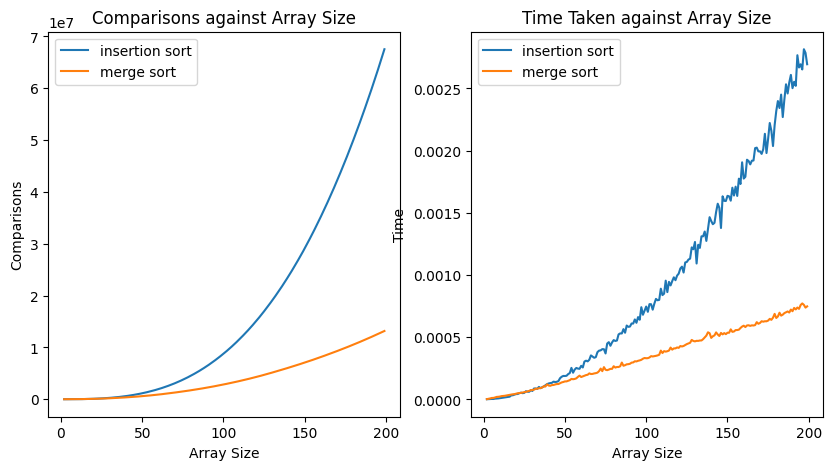

In [9]:
"""
    Plot insertion sort vs mergesort time and comparisons just for an easy visual representation of their efficiency
    -  size of array ranges from 2 to 100
"""

sizes = [i for i in range(2, 200)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(100, sizes)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].plot(sizes, insertion_comparison_array, label = "insertion sort")
axs[0].plot(sizes, merge_comparison_array, label = "merge sort")
axs[0].legend()
axs[0].set_title("Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[1].plot(sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time")

---

# **Part a: Implementation of hybrid sorting algorithm**

In [15]:
# def hybrid_sort(data, S):
    # """
    # Hybrid sorting algorithm that combines insertion sort and mergesort:
    # Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
    # the algorithm will switch to Insertion Sort, which is efficient for small-sized input

    # Args:
    #     data: Array containing list of integers to be sorted
    #     S: Threshold value for switching to insertion sort
    
    # Returns:
    #     merge(sorted1, sorted2): Merged sorted list of the input data
    # """

#     # Base Case
#     if len(data) == 1:
#         return data, 0
    

#     elif len(data) > 1:
#         mid = len(data)//2
#         lower = data[:mid]
#         upper = data[mid:]

#         if (len(lower) <= S):
#             sorted1 = insertion_count(lower)
#         else:
#             sorted1 = hybrid_sort(lower, S) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)

#         if (len(upper) <= S):
#             sorted2 = insertion_count(upper)
#         else:
#             sorted2 = hybrid_sort(upper, S) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)

#         return merge(sorted1, sorted2)


def hybrid_sort(data, S, compObj):
    """
    Hybrid sorting algorithm that combines insertion sort and mergesort:
    Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
    the algorithm will switch to Insertion Sort, which is efficient for small-sized input

    Args:
        data: Array containing list of integers to be sorted
        S: Threshold value for switching to insertion sort
    
    Returns:
        merge(sorted1, sorted2): Merged sorted list of the input data
    """

    # Base Case
    if len(data) == 1:
        return data, 0

    if len(data) <= S:
        return insertion_count(data, compObj)
    
    mid = len(data) // 2
    lower = data[:mid]
    upper = data[mid:]
    sorted1 = hybrid_sort(lower, S, compObj)
    sorted2 = hybrid_sort(upper, S, compObj)
    return merge(sorted1, sorted2, compObj)

In [16]:
def test_hybrid(data, S, compObj):
    """
    Calculates number of comparisons and time taken by hybrid sort to sort the given array

    Returns:
        insertion_comparisons: Number of comparisons made by hybrid sort
        insertion_time: Time taken by hybrid sort
    """

    start_time = time.time()
    _ = hybrid_sort(data, S, compObj)
    hybrid_time = time.time() - start_time
    
    return compObj.get(), hybrid_time

# **Part c: Analyse Time Complexity** 

In [17]:
def hybrid_stats_size(iterations, all_sizes, S):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for hybrid sort for a range of sizes

    Args:
        iterations: Number of tests to be conducted for each size
        all_sizes: List of sizes to be tested
        S: Threshold value for switching to insertion sort

    Returns:
        hybrid_comparison_array: Array of number of comparisons for each size for hybrid sort
        hybrid_time_array: Array of time taken for each size for hybrid sort
    """

    hybrid_comparison_array = []
    hybrid_time_array = []
    compHybrid = KeyComp()

    for i in range(len(all_sizes)): # test for each size
        size = all_sizes[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            input_array = generate_data(size=size, upper_lim=1000)
            hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)
 
            # i.e. each index in the arrays corresponds to a size
            if iteration == 0:
                hybrid_comparison_array.append(hybrid_comparisons)
                hybrid_time_array.append(hybrid_time)

            # i.e. each element in the arrays is the average of all iterations for that size   
            else:
                hybrid_comparison_array[i] = (hybrid_comparison_array[i] + hybrid_comparisons) // 2
                hybrid_time_array[i] = (hybrid_time_array[i] + hybrid_time) / 2

        print(f"Size: {size}")
        print(f"Number of comparisons: {hybrid_comparisons}")
        print(f"Time taken: {hybrid_time}\n")
    
    return hybrid_comparison_array, hybrid_time_array

In [18]:
def hybrid_stats_S(iterations, size, all_S):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for hybrid sort for a range of S values

    Args:
        iterations: Number of tests to be conducted for each size
        size: Size of array to be sorted
        all_S: List of S values to be tested

    Returns:
        hybrid_comparison_array: Array of number of comparisons for each size for hybrid sort
        hybrid_time_array: Array of time taken for each size for hybrid sort
    """

    hybrid_comparison_array = []
    hybrid_time_array = []
    compHybrid = KeyComp()

    for i in range(len(all_S)): # test for each size
        S = all_S[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            input_array = generate_data(size=size, upper_lim=1000)
            hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)
 
            # i.e. each index in the arrays corresponds to a size
            if iteration == 0:
                hybrid_comparison_array.append(hybrid_comparisons)
                hybrid_time_array.append(hybrid_time)

            # i.e. each element in the arrays is the average of all iterations for that size   
            else:
                hybrid_comparison_array[i] = (hybrid_comparison_array[i] + hybrid_comparisons) // 2
                hybrid_time_array[i] = (hybrid_time_array[i] + hybrid_time) / 2

        print(f"S = {S}")
        print(f"Number of comparisons: {hybrid_comparisons}")
        print(f"Time taken: {hybrid_time}\n")
    
    return hybrid_comparison_array, hybrid_time_array

## _**c(i): Fixed value of S**_
Fixed <u>S = 20</u>, varying list size. Only each power of 10 interval from 1000 to 10 million is plotted.

Size: 1000
Number of comparisons: 49710
Time taken: 0.00322723388671875

Size: 10000
Number of comparisons: 696975
Time taken: 0.025615215301513672

Size: 100000
Number of comparisons: 7467046
Time taken: 0.24820208549499512

Size: 1000000
Number of comparisons: 86322773
Time taken: 2.889648914337158

Size: 10000000
Number of comparisons: 993303670
Time taken: 34.702128887176514



Text(0, 0.5, 'Time Taken (s)')

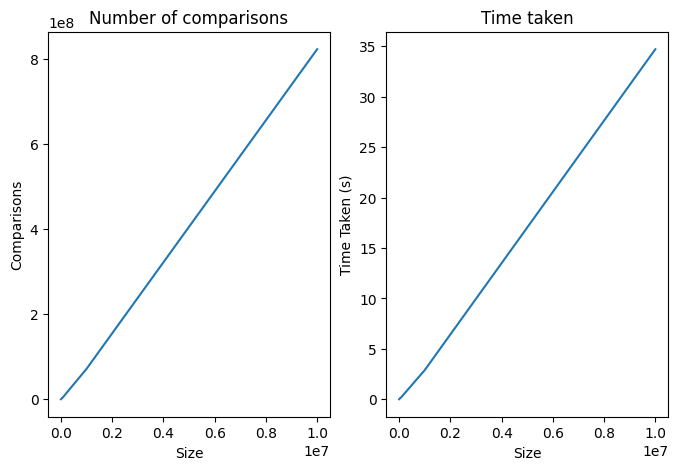

In [19]:
fixed_S = 20
hybrid_sizes = [int(1000 * math.pow(10, i)) for i in range(5)] # array sizes range from 1000 to 10 million

hybrid1_comparison_array, hybrid1_time_array = hybrid_stats_size(5, hybrid_sizes, fixed_S)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8, 5)
axs[0].plot(hybrid_sizes, hybrid1_comparison_array)
axs[0].set_title("Number of comparisons")
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Comparisons")
axs[1].plot(hybrid_sizes, hybrid1_time_array)
axs[1].set_title("Time taken")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Time Taken (s)")

## _**c(ii): Fixed value of list size**_
Fixed <u>size = 100000</u>, varying S. Comparisons and time taken for each value of S in [1,100] is plotted

S = 1
Number of comparisons: 13257169
Time taken: 1.720329999923706

S = 2
Number of comparisons: 21741811
Time taken: 0.8135571479797363

S = 3
Number of comparisons: 27994222
Time taken: 0.20787930488586426

S = 4
Number of comparisons: 34249014
Time taken: 0.2075200080871582

S = 5
Number of comparisons: 40504076
Time taken: 0.20644426345825195

S = 6
Number of comparisons: 46847661
Time taken: 0.21312212944030762

S = 7
Number of comparisons: 53209147
Time taken: 0.2129988670349121

S = 8
Number of comparisons: 59569031
Time taken: 0.21351194381713867

S = 9
Number of comparisons: 65929573
Time taken: 0.21252799034118652

S = 10
Number of comparisons: 72288950
Time taken: 0.2165062427520752

S = 11
Number of comparisons: 78649559
Time taken: 0.2129359245300293

S = 12
Number of comparisons: 85320650
Time taken: 0.23589515686035156

S = 13
Number of comparisons: 92090561
Time taken: 0.24236392974853516

S = 14
Number of comparisons: 98857515
Time taken: 0.24223995208740234

S = 15
N

Text(0, 0.5, 'Time Taken (s)')

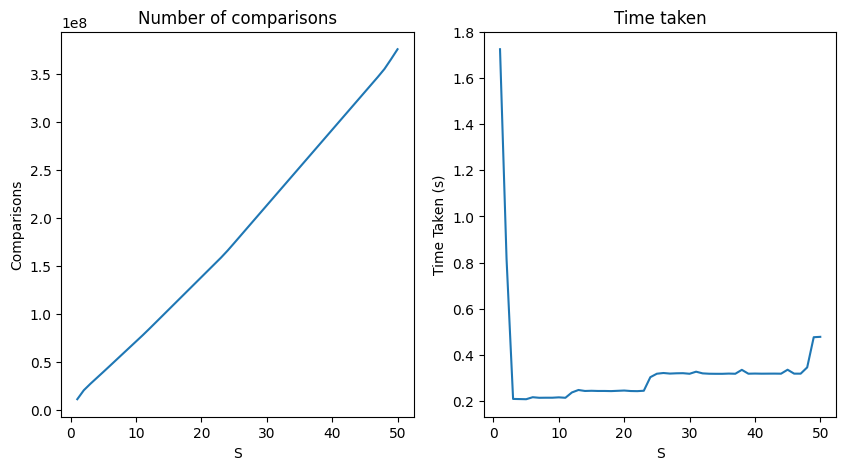

In [21]:
fixed_size = 100000
S_array = [i for i in range(1,51)]

hybrid2_comparison_array, hybrid2_time_array = hybrid_stats_S(5, fixed_size, S_array)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].plot(S_array, hybrid2_comparison_array)
axs[0].set_title("Number of comparisons")
axs[0].set_xlabel("S")
axs[0].set_ylabel("Comparisons")
axs[1].plot(S_array, hybrid2_time_array)
axs[1].set_title("Time taken")
axs[1].set_xlabel("S")
axs[1].set_ylabel("Time Taken (s)")

## _**c(iii): Optimal Value of S**_
The purpose of a hybrid sorting algorithm is to get the best of both worlds with insertion sort and mergesort. While I'm pretty sure we could find the optimal S by mathematically deriving a formula combining the time complexity equations of insertion sort and mergesort, I don't want to do all that math and also I believe there is a logical solution to this problem.

Although the time complexity of mergesort is generally better than insertion sort, insertion sort has better performance with smaller input array sizes. This is the appeal of the hybrid sorting algorithm over mergesort alone. 

Thus, finding the optimal value of S can be essentially to find the <u>array size at which insertion sort begins to perform more poorly than mergesort</u>. This can be found by plotting the performance of insertion sort and mergesort and finding the intersection point. 
 

Text(0, 0.5, 'Time')

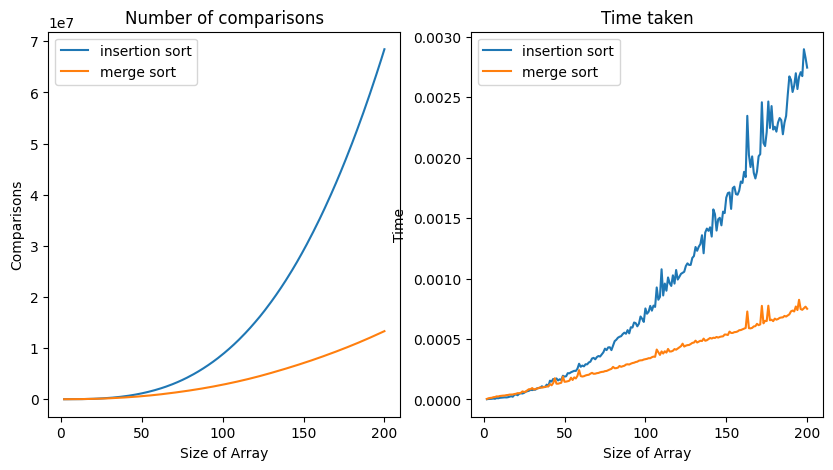

In [22]:
all_sizes = [i for i in range(2, 201)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(100, all_sizes)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].plot(all_sizes, insertion_comparison_array, label = "insertion sort")
axs[0].plot(all_sizes, merge_comparison_array, label = "merge sort")
axs[0].legend()
axs[0].set_title("Number of comparisons")
axs[0].set_xlabel("Size of Array")
axs[0].set_ylabel("Comparisons")
axs[1].plot(all_sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(all_sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time taken")
axs[1].set_xlabel("Size of Array")
axs[1].set_ylabel("Time")

Since the intersection point clearly occurs at a very low value of S, we will replot the graphs using a much smaller range of array sizes

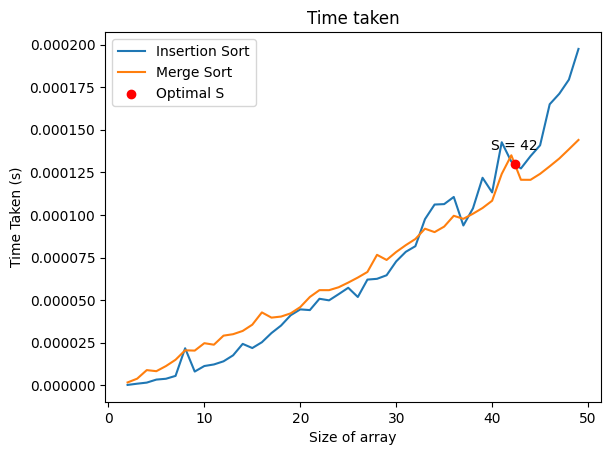

In [26]:
all_sizes = [i for i in range(2, 50)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(5000, all_sizes)

# Convert lists to NumPy arrays
all_sizes = np.array(all_sizes)
insertion_time_array = np.array(insertion_time_array)
merge_time_array = np.array(merge_time_array)

# Find intersection points
diff = insertion_time_array - merge_time_array
sign_change = np.where(np.diff(np.sign(diff)))[0]  # indices where sign changes

intersect_pt = []
for i in sign_change:
    # Linear interpolation to approximate intersection
    x1, x2 = all_sizes[i], all_sizes[i + 1]
    y1, y2 = insertion_time_array[i], insertion_time_array[i + 1]
    y3, y4 = merge_time_array[i], merge_time_array[i + 1]

    # Solve for x where the two line segments intersect
    x_intersect = x1 + (x2 - x1) * (y1 - y3) / ((y1 - y3) - (y2 - y4))
    y_intersect = np.interp(x_intersect, [x1, x2], [y1, y2])

    intersect_pt.append([x_intersect, y_intersect])

# Plot the lines
plt.plot(all_sizes, insertion_time_array, label="Insertion Sort")
plt.plot(all_sizes, merge_time_array, label="Merge Sort")

# Plot intersection points
# for x_int, y_int in intersect_pt:
#     plt.scatter(x_int, y_int, color='red', zorder=3, label="Optimal S")
#     plt.annotate(f"S = {int(x_int)}", (x_int, y_int),
#                  textcoords="offset points", xytext=(0,10), ha='center')

x_int, y_int = intersect_pt[-1]
plt.scatter(x_int, y_int, color='red', zorder=3, label="Optimal S")
plt.annotate(f"S = {int(x_int)}", (x_int, y_int),
                textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.title("Time taken")
plt.xlabel("Size of array")
plt.ylabel("Time Taken (s)")
plt.show()

# **Part d: Compare with Original Mergesort**
From part c(iii), <u>S = 42</u> is the optimal value of S. We will now compare hybrid sort with S = 42 against normal mergesort

In [28]:
cmp_size = int(math.pow(10, 7)) # array of size 10 million
# cmp_size = 1000000
S = 42
compHybrid = KeyComp()
compMerge = KeyComp()

for i in range(5):
    input_array = generate_data(size=cmp_size, upper_lim=1000)
    if i == 0:
        hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)
        merge_comparisons, merge_time = test_merge(input_array, compMerge)
    else:
        hc, ht = test_hybrid(input_array, S, compHybrid)
        mc, mt = test_merge(input_array, compMerge)
        hybrid_comparisons, hybrid_time = (hybrid_comparisons + hc) // 2, (hybrid_time + ht) / 2
        merge_comparisons, merge_time = (merge_comparisons + mc) // 2, (merge_time + mt) / 2
    
    print(f"Iteration {i+1} done")

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done


Hybrid Sort Comparisons: 895345199
Merge Sort Comparisons: 1270661191
Hybrid Sort Time: 47.55575296282768
Merge Sort Time: 194.33583956956863


Text(0, 0.5, 'Time Taken (s)')

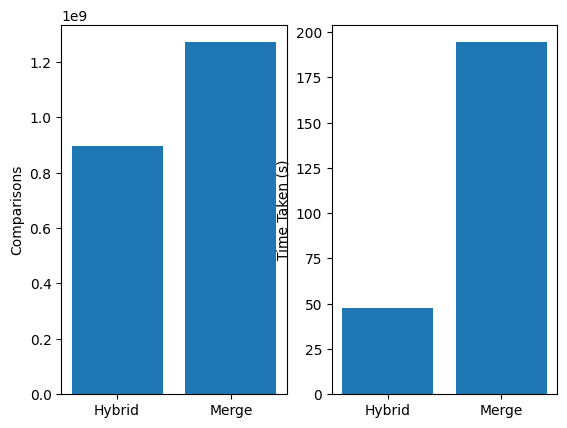

In [29]:
print(f"Hybrid Sort Comparisons: {hybrid_comparisons}")
print(f"Merge Sort Comparisons: {merge_comparisons}")
print(f"Hybrid Sort Time: {hybrid_time}")
print(f"Merge Sort Time: {merge_time}")

fig, axs = plt.subplots(1, 2)
axs[0].bar(["Hybrid", "Merge"], [hybrid_comparisons, merge_comparisons])
axs[0].set_ylabel("Comparisons")
axs[1].bar(["Hybrid", "Merge"], [hybrid_time, merge_time])
axs[1].set_ylabel("Time Taken (s)")

From the result above, it can be seen that hybrid sort has both a shorter running time and takes a fewer number of comparisons to sort data compared to mergesort